# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [25]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/nicolesamrao/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


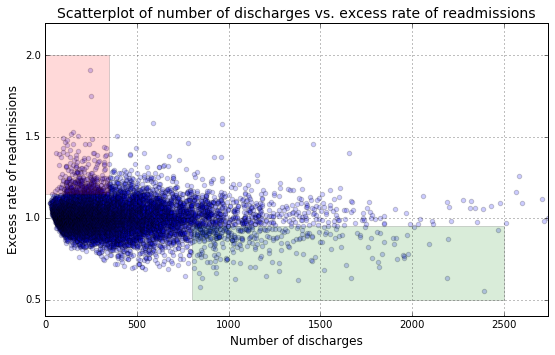

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

A. Do you agree with the above analysis and recommendations? Why or why not?
---

Yes, but the coorelation does not look as strong as the conclusion suggests. The slope not very steep, looks like it could go either way given that most of the data sits a little above and below a rate of 1 with less than 500 readmissions. 

I would test to ensure that there is actually a differnce.

____

B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
---   

### Setup an appropriate hypothesis test.

*My reccomendation would be to create a test that tries to discern if there is a significant difference in the mean excess readmission rate of small hospitals with less than 100 discharges and large hospitals with greater than 1000 discharges.*

*More specifically, is the mean readmission rate for small hospitals larger and significant?*

Therefore I will use a one-tailed difference in means hypothesis test.

In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023.

 - Mean Readmission Rate for Small Hospitals, ** $ \mu_s $  = 1.023**

In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978.

 - Mean Readmission Rate for Small Hospitals. **$ \mu_l $ = 0.978**

**Hypotheses:**

- Null Hypothesis (Ho): $ \mu_s $ - $ \mu_l  = 0 $


- Alternative Hypothesis (Ho): $ \mu_s  -  \mu_l >  0$

### Compute and report the observed significance value (or p-value).

In [38]:
small_mean = 1.023
large_mean = 0.978

# difference in means
dim = small_mean - large_mean

# filtering data
df = clean_hospital_read_df
small = df[df['Number of Discharges'] < 100]
large = df[df['Number of Discharges'] > 1000]

# Compute Standard Deviations
std_small = small['Number of Discharges'].std() 
std_large = large['Number of Discharges'].std() 

# Compute Standard Error
n1 = len(small)
n2 = len(large)

SE = math.sqrt((std_small**2 / n1) + (std_large**2 / n2))

# Compute z-score
z_score = (dim - 0) / SE

z_score

0.0021079511747529684

Looking Up the z-score on the z table:
- A z-score of .00 cooresponds with a probability of .5000
<img src="image2.png">
Calculating p-value (tail area, or the area of getting at least this value given that the null hypothesis is true): 

In [39]:
p_value = 1 - .5000
p_value

0.5

### Report statistical significance for  α  = .01.

Assuming that the null hypothesis is true, the probability of getting $ \mu_s  -  \mu_l >  0$ is large at 0.5 or 50%

<img src="image.png">

As a significance of $ \alpha = .01 $:  $ p-value >  \alpha $


This means that when the null hypothesis is true (and there is no difference in the avg. mean readmissions rate between large and small hosptials):

- The probability of seeing a difference in means where smaller hospitals have a higher average mean readmisssions rate is likely not significant.

- **Therefore we ACCEPT the null hypothesis**

- **There is no difference in the avg. mean readmissions rate between large and small hosptial**


### Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

- **Statistical Significance** requires both a hypothesis and a test statistic to determine the 'statistical significance'.

- **Practical Significance** is determined if the the actual difference being extimated will affect a decision being made. 

The difference in the average mean readmissions rate between small and large hospitals may not be statistically significant, but it may be practically significant.

I would advise the client to look at the differences regardless of statistical significance. Practically, it may make sense to target smaller hospitals anyways as it will help target lowering readmissions rates in at least some institutions.

### What are the advantages and disadvantages of using this plot to convey information?

Thr plot is good for detecting intial coorelations in the data but does not do a good job at breaking down the trends it sees. This can be done by creating additional plots that highlight and anlayze the apparent trends in the scatterplot for magnitude, outliers, further trends...

### Construct another plot that conveys the same information in a more direct manner.

In [ ]:
#scatter plot less than 100

#scatterplot more than 1000

#histograms for both

In [40]:
small

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,TX,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


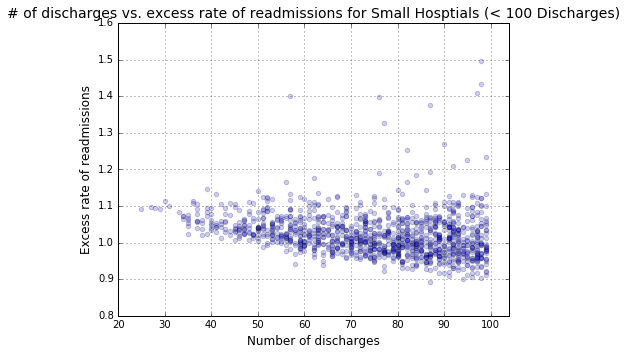

In [49]:
x = small['Number of Discharges']
y = small['Excess Readmission Ratio']
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.set_xlim([20, max(x) + 5])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('# of discharges vs. excess rate of readmissions for Small Hosptials (< 100 Discharges)', fontsize=14)

ax.grid(True)
fig.tight_layout()

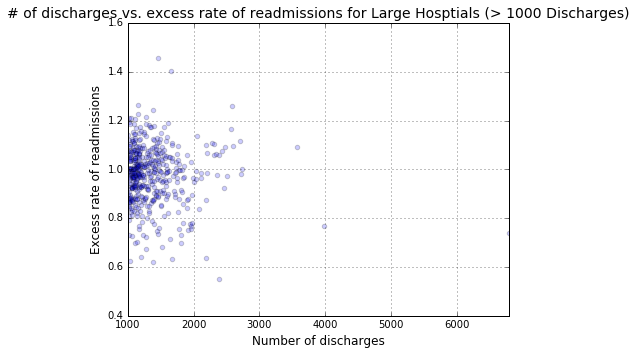

In [48]:
x = large['Number of Discharges']
y = large['Excess Readmission Ratio']
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.set_xlim([1000, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('# of discharges vs. excess rate of readmissions for Large Hosptials (> 1000 Discharges)', fontsize=14)

ax.grid(True)
fig.tight_layout()

***The smaller hospitals show a steeper more coorelated downward trend with increasing discharches, showing that the marginal increase in discharging has a bigger impact on decreasing the readmission rate***

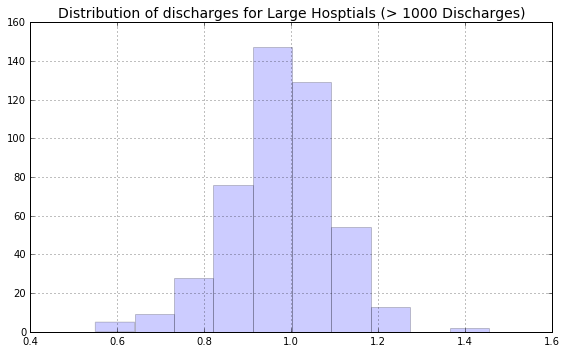

In [53]:
x = large['Number of Discharges']
y = large['Excess Readmission Ratio']
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(y,alpha=0.2)


ax.set_title('Distribution of discharges for Large Hosptials (> 1000 Discharges)', fontsize=14)

ax.grid(True)
fig.tight_layout()

ValueError: max must be larger than min in range parameter.

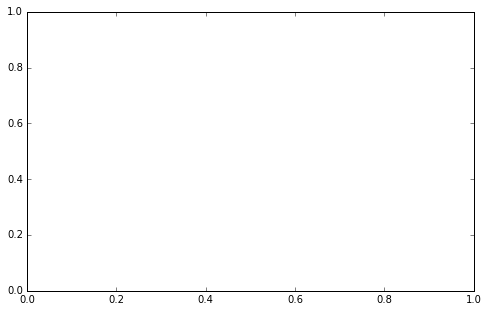

In [54]:
x = small['Number of Discharges']
y = small['Excess Readmission Ratio']

fig, ax = plt.subplots(figsize=(8,5))
ax.hist(y,alpha=0.2)


ax.set_title('Distribution of discharges for Small Hosptials (< 100 Discharges)', fontsize=14)

ax.grid(True)
fig.tight_layout()